# Midterm
*EMSE 6574 - Programming Analytics*

Due **10/29/18 by 6:00pm**
Madeline Warndorf

*Notes:*
 - All code should follow the PEP 8 Style Guide for Python
 - Assignment should be submitted using jupyter notebooks
  - File name should follow “{Your Name} – Assignment_XX_Submission”
  - Each Task should be contained in its own cell
  - Each Task should be properly commented
  - Each Task should print out the answer to the Task if appropriate (Ex. Task 2)
  - Sample submission can be found on blackboard under the “outline” section
  - **Not following these standards may result in lost points**

## Task 1
Create a class Person with the following attributes:
- age (int) - age of the person
- height (int) - height of the person in inches
- weight (int) - weight of the person in inches
- sex (male/female, str) - the sex of the person (‘male’/‘female’ or ‘m’/‘f’)
- hobbies (lst[str]) - list of a person’s hobbies
With the following attributes:
- __init__(age, height, weight, sex, hobbies)
    - Which will initialize each attribute

In [45]:
#Importing needed libraries
import numpy as np
import numpy.random as rand
import math
import csv
import matplotlib.pyplot as plt

In [46]:
#creating class Person
class Person():
    def __init__(self, age, height, weight, sex, hobbies):
        self.inst_attr = "person"
        self.age = int(age)
        self.height = int(height)
        self.weight = int(weight)
        self.sex = str(sex)
        self.hobbies = hobbies


## Task 2:
Create a class Population with the following attributes:
- pop (list[Person]) - a list of people in the population
With the following methods:
- __init__(people) – initialize the Population.pop attribute with people
- add_person(person) - a method that takes a Person and adds them to the population (updating the self.pop attribute)
- add_people(people) - a method that takes a list of Person objects and adds them to the population (updating the self.pop attribute)
- top_hobby(age, range = 5) – method is described in Task 4
- filter_population(m_or_f, height_min, height_max, weight_min, weight_max) – method is described in Task 5
- save_population() – method is described in Task 6
- stats() – method is described in Task 7

In [48]:
# Space for Task 2
#Creating class Population
#people = list of people with Person objects
#person = a single person in the people list
import numpy as np
class Population(Person):
    def __init__(self, people):
        self.inst_attr = "people"
        self.pop = people
    
    def add_person(self, person):
        """adds Person to population (pop)"""
        self.pop.append(person)
    
    def add_people(self, people):
        """adds people (a list that has Person objects) to population"""
        for person in people:
            self.add_person(person)
            
    def top_hobby(self, age, range = 5):
        """will be added once Task 4 is complete
        takes the population and based on the age range given from age +- range
        returns the top hobby from the population given the inclusive age range.
        Args:
            self.agelow = lower bound for age range
            self.ageupper = upper bound for age range
            hobbylist (list) - a list for the hobbies from the age range to be stored
            hobbydict (dictionary) - dictionary to contain hobby and count
            maximum (int) - element used to find the maximum count from the hobby
            tophobby (str) - hobby that is the most popular
        Returns:
            tophobby (str) - hobby that is the most popular given the population age range"""
        self.agelow = age - 5
        self.ageupper = age + 5
        hobbylist = []
        hobbydict = {}
        for person in people:
            if person.age >= self.agelow:
                if person.age <= self.ageupper:
                    for hobby in person.hobbies:
                        hobbylist.append(hobby)
                else:
                    continue
            else:
                continue
        for hobby in hobbylist:
            if hobby in hobbydict:
                hobbydict[hobby] += 1
            else:
                hobbydict[hobby] = 1
        #print(hobbydict)
        maximum = 0
        tophobby = ""
        for k, v in hobbydict.items():
            if v > maximum:
                maximum = v
                tophobby = k
            else:
                continue
        return tophobby
    
    def filter_population(self, m_or_f, height_min, height_max, weight_min, weight_max):
        #will be added once Task 5 is complete
        """Takes the population and based on the sex, height range (height_min : height_max), and weight range (weight_min : weight_max)
        returns a subpopulation that has been filtered using the sex, height range, weight range.
    Args:
        self.m_or_f (str) - sex ("male", "female", "both") that will be used to be sorted (filtering requirement)
        self.height_min (int) - minimum height for the desired height range (filtering requirement)
        self.height_max (int) - maximum height for the desired height range (filtering requirement)
        self.weight_min (int) - minimum weight for the desired weight range (filtering requirement)
        self.weight_max (int) - maximum weight for the desired weight range (filtering requirement)
        subpop (list) - subpopulation containing people that fit the filtering requirements
    Returns:
        subpop (list) - subpopulation containing people that fit the filtering requirements"""
        self.m_or_f = str(m_or_f)
        self.height_min = int(height_min)
        self.height_max = int(height_max)
        self.weight_min = int(weight_min)
        self.weight_max = int(weight_max)
        subpop = []
        for person in people:
            if person.sex == self.m_or_f:
                #print("sex")
                if person.height >= self.height_min:
                    if person.height <= self.height_max:
                        #print("height")
                        if person.weight >= self.weight_min:
                            if person.weight <= self.weight_max:
                                #print("weight")
                                subpop.append(person)
                            else:
                                continue
                        else:
                            continue
                    else:
                        continue
                else:
                    continue
            elif self.m_or_f == "both":
                if person.height >= self.height_min:
                    if person.height <= self.height_max:
                        #print("height")
                        if person.weight >= self.weight_min:
                            if person.weight <= self.weight_max:
                                #print("weight")
                                subpop.append(person)
                            else:
                                continue
                        else:
                            continue
                    else:
                        continue
                else:
                    continue
                
            else:
                continue
        if len(subpop) == 0:
            subpop = "There are not any people in the population with the sex {} and with a height between the height range {} and {} as well as a weight between the weight range {} and {}.".format(self.m_or_f,self.height_min,self.height_max,self.weight_min,self.weight_max)
        return subpop
   

    
    def save_population(self):
        #will be added once Task 6 is complete
        """Takes the population and saves it as a csv.
        Args:
            file_path - file path of the name of the csv file
            csv_writer - method used to write new rows
            field_names - column names
            persondata [] - list of person data from population
        Returns:
            population_csv.csv - population csv file"""
        file_path = "population_csv.csv"
        with open(file_path, 'w', newline="") as csv_file:
            csv_writer = csv.writer(csv_file, quotechar='"', lineterminator='\n')
            field_names = ['Age', 'Height', 'Weight', 'Sex', 'Hobbies']
            csv_writer.writerow(field_names)
            for person in people:
                persondata = [person.age,person.height,person.weight,person.sex,person.hobbies]
                csv_writer.writerow(persondata)
        csv_file.close()

    def stats(self):
        #will be added once Task 7 is complete
        """Takes the population and returns a dictionary containing the mean, 
        median, and standard deviation for each distribution (Age, Height, Weight) 
        for the entire population, females, and males
    Args:
        popstats {} - dictionary to store the means, medians, and standard deviations for age, height, and weight
        agestats {} - dictionary to store the people's ages by 'male' and 'female'
        heightstats {} - dictionary to store the people's heights by 'male' and 'female'
        weightstats {} - dictionary to store the people's weights by 'male' and 'female'
    Returns:
        popstats {} - dictionary with the means, medians, and standard deviations for age, height, and weight
        NOTE: Means, medians, and standard deviations are rounded up to the 2nd decimal point."""
        popstats = {}
        agestats = {}
        heightstats = {}
        weightstats = {}
        #age, height, weight mini dictionaries
        for person in people:
            agestats.setdefault(person.sex,[]).append(person.age)
            heightstats.setdefault(person.sex,[]).append(person.height)
            weightstats.setdefault(person.sex,[]).append(person.weight)
        
        #MEAN
        #age
        #print(agestats)
        popstats['Mean Age'] = round(np.mean([number for k in agestats for number in agestats[k]]),2)
        popstats['Mean Male Age'] = round(np.mean(agestats['male']),2)
        popstats['Mean Female Age'] = round(np.mean(agestats['female']),2)
        #height
        #print(heightstats)
        popstats['Mean Height'] = round(np.mean([number for k in heightstats for number in heightstats[k]]),2)
        popstats['Mean Male Height'] = round(np.mean(heightstats['male']),2)
        popstats['Mean Female Height'] = round(np.mean(heightstats['female']),2)
        #weight
        #print(weightstats)
        popstats['Mean Weight'] = round(np.mean([number for k in weightstats for number in weightstats[k]]),2)
        popstats['Mean Male Weight'] = round(np.mean(weightstats['male']),2)
        popstats['Mean Female Weight'] = round(np.mean(weightstats['male']),2)
        
        #MEDIAN
        #age
        popstats['Median Age'] = round(np.median([number for k in agestats for number in agestats[k]]),2)
        popstats['Median Male Age'] = round(np.median(agestats['male']),2)
        popstats['Median Female Age'] = round(np.median(agestats['female']),2)
        #height
        popstats['Median Height'] = round(np.median([number for k in heightstats for number in heightstats[k]]),2)
        popstats['Median Male Height'] = round(np.median(heightstats['male']),2)
        popstats['Median Female Height'] = round(np.median(heightstats['female']),2)
        #weight
        popstats['Median Weight'] = round(np.median([number for k in weightstats for number in weightstats[k]]),2)
        popstats['Median Male Weight'] = round(np.median(weightstats['male']),2)
        popstats['Median Female Weight'] = round(np.median(weightstats['female']),2)
        
        #STANDARD DEVIATION
        #age
        popstats['Standard Deviation Age'] = round(np.std([number for k in agestats for number in agestats[k]]),2)
        popstats['Standard Deviation Male Age'] = round(np.std(agestats['male']),2)
        popstats['Standard Deviation Female Age'] = round(np.std(agestats['female']),2)
        #height
        popstats['Standard Deviation Height'] = round(np.std([number for k in heightstats for number in heightstats[k]]),2)
        popstats['Standard Deviation Male Height'] = round(np.std(heightstats['male']),2)
        popstats['Standard Deviation Female Height'] = round(np.std(heightstats['female']),2)
        #weight
        popstats['Standard Deviation Weight'] = round(np.std([number for k in weightstats for number in weightstats[k]]),2)
        popstats['Standard Deviation Male Weight'] = round(np.std(weightstats['male']),2)
        popstats['Standard Deviation Female Weight'] = round(np.std(weightstats['female']),2)
        
        
        return popstats
    
        
        

## Task 3:
Create a Population of 100 Person’s based on the following distributions for their attributes:
- age = normal distribution with mean at 50 and std at 20
- height_male = normal distribution with mean at 70 and std at 4
- height_female = normal distribution with mean at 65 and std at 3.5
- weight_male = 10/3 * height - 58 + np.random.normal(scale=7)
- weight_female = 5/2 * height - 15 + np.random.normal(scale=7)
- sex = binomial distribution with p(male/female) equals 0.5
- hobbies = random selection (1-5 hobbies) from the following:
    - [“Reading”, “TV”, “Fishing”, “Video Games”, “Gardening”, “Exercising”, “Listening to Music”, “Golf”, “Board Games”, “Tennis”, “Painting”, “Guitar”, “Violin”, “Writing”, “Swimming”, “Running”, “Cooking”, “Drawing”, “Basketball”, “Skiing”, “Photography”]
NOTES:
- For age, height_female, height_male, weight_female, and weight_male you will want to round or take the ceil/floor of the generated values to simplify results.

In [61]:
#Space for Task 3
def creating_person():
    """Creates person with Person objects using criteria above and returns person
    Args:
        age (int) - math.ceil() integer (random integer) found from a normal distrubition with mean at 50 and std at 20
        sex (str) - male [1] or female [0] found at random from binomial distribution with p(male/female) equals 0.5
        height_male (int) - (random integer) found from normal distribution with mean at 70 and std at 4
            height (int) - math.ceil() integer from height_male
        weight_male (int) - weight of male found from: 10/3 * height - 58 + np.random.normal(scale=7)
            weight (int) - math.ceil() integer from weight_male
        height_female (int) normal distribution with mean at 65 and std at 3.5
            height (int) - math.ceil() integer from height_female
        weight_female (int) - weight of female found from: 5/2 * height - 15 + np.random.normal(scale=7)
            weight (int) - math.ceil() integer from weight_female
        hobbiesarray (array) - hobbies given to choose from
        hobbyarray (array) - randomly selected 5 hobbies from hobbiesarray
        hobbies (list) - hobbyarray turned into a list
    Returns:
        person - object with Person(age, height, weight, sex, hobbies)
    """
    age = rand.normal(loc = 50, scale = 20, size = (1))
    age = math.ceil(age)
    sex = np.random.binomial(1, 0.5, size=None)
    if sex == 1:
        #Assuming 1 stands for male
        sex = "male"
        height_male = rand.normal(loc = 70, scale = 4, size = (1))
        height = math.ceil(height_male)
        weight_male = 10/3 * height - 58 + np.random.normal(scale=7)
        weight = math.ceil(weight_male)
    else:
        #Assuming 0 stands for female
        sex = "female"
        height_female = rand.normal(loc = 65, scale = 3.5, size = (1))
        height = math.ceil(height_female)
        weight_female = 5/2 * height - 15 + np.random.normal(scale=7)
        weight = math.ceil(weight_female)
    hobbiesarray = ["Reading", "TV", "Fishing", "Video Games", "Gardening", "Exercising", "Listening to Music", "Golf", "Board Games", "Tennis", "Painting", "Guitar", "Violin", "Writing", "Swimming", "Running", "Cooking", "Drawing", "Basketball", "Skiing", "Photography"]
    hobbyarray = np.random.choice(hobbiesarray, 5)
    hobbies = []
    for hobby in hobbyarray:
        hobbies.append(hobby)
    person = Person(age, height, weight, sex, hobbies)
    return person

def creating_population(n):
    """Creates a "population" which is a list of people (having Person objects) using creating_person function above and returns a population
    Args:
        n int() - number of desired people in the population
        people (list) - list of people with n amount of persons (having Person objects)
    Returns:
        people (list) - list of people with n amount of persons (having Person objects)
    """
    people = []
    for i in range(0,n):
        person = creating_person()
        people.append(person)
    return people

people = creating_population(100)

#using Population(people) to create a population
population1 = Population(people)





## Task 4:
Create a method top_hobby(age, range = 5), where age and range are integers defining an age range (inclusive). Based on the age range return the most popular hobby for that subset of the population.

E.x. population.top_hobby(15, 5) -> ‘Video Games’

In [50]:
#Space for Task 4
"""def top_hobby(self, age, range = 5):
    #takes the population and based on the age range given from age +- range
    #returns the top hobby from the population given the inclusive age range.
    #Args:
    #    hobbylist (list) - a list for the hobbies from the age range to be stored
    #   hobbydict - dictionary to contain hobby and count
    #   maximum - element used to find the maximum count from the hobby
    #   tophobby - hobby that is the most popular
    #Returns:
    #   tophobby - hobby that is the most popular given the population age range

    #setting age range with self.agelow, self.ageupper
    self.agelow = age - 5
    self.ageupper = age + 5
    hobbylist = []
    hobbydict = {}
    for person in people:
        if person.age >= self.agelow:
            if person.age <= self.ageupper:
                for hobby in person.hobbies:
                    hobbylist.append(hobby)
                else:
                    continue
            else:
                continue
    for hobby in hobbylist:
        if hobby in hobbydict:
            hobbydict[hobby] += 1
        else:
            hobbydict[hobby] = 1
    maximum = 0
    tophobby = ""
    for k, v in hobbydict.items():
        if v > maximum:
            maximum = v
            tophobby = k
        else:
            continue
    return tophobby"""

population1.top_hobby(66,5)
        
    


        
            
            

'TV'

## Task 5:
Create a method for Population called filter_population(m_or_f, height_min, height_max, weight_min, weight_max). Where m_or_f is a string = ('male', 'female', 'both') and height_min, height_max, weight_min, and weight_max are integer values. Each of the parameters should be used to filter the Population.pop down to the relevant Person objects, and return the resulting list of Persons

Example – Population.filter_population(‘male’, 48, 84, 100, 300) would get the Person objects with the following:
- Person.sex = ‘male’
- 48 <= Person.height < = 84
- 100 <= Person.weight <= 300

In [51]:
#Space for Task 5
"""def filter_population(self, m_or_f, height_min, height_max, weight_min, weight_max):
    #will be added once Task 5 is complete
#    Takes the population and based on the sex, height range (height_min : height_max), and weight range (weight_min : weight_max)
#        returns a subpopulation that has been filtered using the sex, height range, weight range.
#    Args:
#        self.m_or_f (str) - sex ("male", "female", "both") that will be used to be sorted (filtering requirement)
#        self.height_min (int) - minimum height for the desired height range (filtering requirement)
#        self.height_max (int) - maximum height for the desired height range (filtering requirement)
#        self.weight_min (int) - minimum weight for the desired weight range (filtering requirement)
#        self.weight_max (int) - maximum weight for the desired weight range (filtering requirement)
#        subpop (list) - subpopulation containing people that fit the filtering requirements
#    Returns:
#        subpop (list) - subpopulation containing people that fit the filtering requirements
    self.m_or_f = str(m_or_f)
    self.height_min = int(height_min)
    self.height_max = int(height_max)
    self.weight_min = int(weight_min)
    self.weight_max = int(weight_max)
    subpop = []
    for person in people:
        if person.sex == self.m_or_f:
            #print("sex")
            if person.height >= self.height_min:
                if person.height <= self.height_max:
                    #print("height")
                    if person.weight >= self.weight_min:
                        if person.weight <= self.weight_max:
                            #print("weight")
                            subpop.append(person)
                        else:
                            continue
                    else:
                        continue
                else:
                    continue
            else:
                continue
        elif self.m_or_f == "both":
            if person.height >= self.height_min:
                if person.height <= self.height_max:
                    #print("height")
                    if person.weight >= self.weight_min:
                        if person.weight <= self.weight_max:
                            #print("weight")
                            subpop.append(person)
                        else:
                            continue
                    else:
                        continue
                else:
                    continue
            else:
                continue
                
        else:
            continue
        if len(subpop) == 0:
            subpop = "There are not any people in the population with the sex {} and with a height between the height range {} and {} as well as a weight between the weight range {} and {}.".format(self.m_or_f,self.height_min,self.height_max,self.weight_min,self.weight_max)
        return subpop"""


population1.filter_population("male",40,70,100,180)

population1.filter_population("both",40,70,100,180)
        
                
                
            

## Task 6:
Create a method for Population called save_population(). This method should take the entire population and save the values out to a csv (with headers/column names).

Example – Person(20, 70, 155, “female”, [“reading”, “golf”, “tv”]) would result in:
- 20, 70, 155, female, “[‘reading’, ‘golf’, ‘tv’]”

In [52]:
#Space for Task 6
"""def save_population(self):
#    Takes the population and saves it as a csv.
#   Args:
#       file_path - file path of the name of the csv file
#       csv_writer - method used to write new rows
#       field_names - column names
#       persondata [] - list of person data from population
#    Returns:
#       population_csv.csv - population csv file
    file_path = "population_csv.csv"
    with open(file_path, 'w', newline="") as csv_file:
        csv_writer = csv.writer(csv_file, quotechar='"', lineterminator='\n')
        field_names = ['Age', 'Height', 'Weight', 'Sex', 'Hobbies']
        csv_writer.writerow(field_names)
        for person in people:
            persondata = [person.age,person.height,person.weight,person.sex,person.hobbies]
            csv_writer.writerow(persondata)
    csv_file.close()"""

population1.save_population()

## Task 7:
Create a method Population.stats(). This method should return a dictionary containing the mean, median, and standard deviation for each distribution (Age, Height, Weight) for the entire population, females, and males.
Example:
- pop.stats() -> {‘Mean Age’: 50, ‘Mean Male Age’: 55, ‘Mean Female Age’: 37.2, ‘Average Height’: 60, etc.}

In [62]:
#Space for Task 7
"""def stats(self):
#    Takes the population and returns a dictionary containing the mean, 
#    median, and standard deviation for each distribution (Age, Height, Weight) 
#    for the entire population, females, and males
#    Args:
#        popstats {} - dictionary to store the means, medians, and standard deviations for age, height, and weight
#        agestats {} - dictionary to store the people's ages by 'male' and 'female'
#        heightstats {} - dictionary to store the people's heights by 'male' and 'female'
#        weightstats {} - dictionary to store the people's weights by 'male' and 'female'
#    Returns:
#        popstats {} - dictionary with the means, medians, and standard deviations for age, height, and weight
#        NOTE: Means, medians, and standard deviations are rounded up to the 2nd decimal point.
    popstats = {}
    agestats = {}
    heightstats = {}
    weightstats = {}
    #age, height, weight mini dictionaries
    for person in people:
        agestats.setdefault(person.sex,[]).append(person.age)
        heightstats.setdefault(person.sex,[]).append(person.height)
        weightstats.setdefault(person.sex,[]).append(person.weight)
        
    #MEAN
    #age
    #print(agestats)
    popstats['Mean Age'] = round(np.mean([number for k in agestats for number in agestats[k]]),2)
    popstats['Mean Male Age'] = round(np.mean(agestats['male']),2)
    popstats['Mean Female Age'] = round(np.mean(agestats['female']),2)
    #height
    #print(heightstats)
    popstats['Mean Height'] = round(np.mean([number for k in heightstats for number in heightstats[k]]),2)
    popstats['Mean Male Height'] = round(np.mean(heightstats['male']),2)
    popstats['Mean Female Height'] = round(np.mean(heightstats['female']),2)
    #weight
    #print(weightstats)
    popstats['Mean Weight'] = round(np.mean([number for k in weightstats for number in weightstats[k]]),2)
    popstats['Mean Male Weight'] = round(np.mean(weightstats['male']),2)
    popstats['Mean Female Weight'] = round(np.mean(weightstats['male']),2)
        
    #MEDIAN
    #age
    popstats['Median Age'] = round(np.median([number for k in agestats for number in agestats[k]]),2)
    popstats['Median Male Age'] = round(np.median(agestats['male']),2)
    popstats['Median Female Age'] = round(np.median(agestats['female']),2)
    #height
    popstats['Median Height'] = round(np.median([number for k in heightstats for number in heightstats[k]]),2)
    popstats['Median Male Height'] = round(np.median(heightstats['male']),2)
    popstats['Median Female Height'] = round(np.median(heightstats['female']),2)
    #weight
    popstats['Median Weight'] = round(np.median([number for k in weightstats for number in weightstats[k]]),2)
    popstats['Median Male Weight'] = round(np.median(weightstats['male']),2)
    popstats['Median Female Weight'] = round(np.median(weightstats['female']),2)
        
    #STANDARD DEVIATION
    #age
    popstats['Standard Deviation Age'] = round(np.std([number for k in agestats for number in agestats[k]]),2)
    popstats['Standard Deviation Male Age'] = round(np.std(agestats['male']),2)
    popstats['Standard Deviation Female Age'] = round(np.std(agestats['female']),2)
    #height
    popstats['Standard Deviation Height'] = round(np.std([number for k in heightstats for number in heightstats[k]]),2)
    popstats['Standard Deviation Male Height'] = round(np.std(heightstats['male']),2)
    popstats['Standard Deviation Female Height'] = round(np.std(heightstats['female']),2)
    #weight
    popstats['Standard Deviation Weight'] = round(np.std([number for k in weightstats for number in weightstats[k]]),2)
    popstats['Standard Deviation Male Weight'] = round(np.std(weightstats['male']),2)
    popstats['Standard Deviation Female Weight'] = round(np.std(weightstats['female']),2)
        
        
    return popstats"""

population1.stats()
    
    
        

{'Mean Age': 52.25,
 'Mean Male Age': 51.57,
 'Mean Female Age': 53.02,
 'Mean Height': 68.22,
 'Mean Male Height': 70.85,
 'Mean Female Height': 65.26,
 'Mean Weight': 165.06,
 'Mean Male Weight': 178.81,
 'Mean Female Weight': 178.81,
 'Median Age': 53.5,
 'Median Male Age': 51.0,
 'Median Female Age': 54.0,
 'Median Height': 68.0,
 'Median Male Height': 71.0,
 'Median Female Height': 66.0,
 'Median Weight': 161.0,
 'Median Male Weight': 181.0,
 'Median Female Weight': 151.0,
 'Standard Deviation Age': 19.9,
 'Standard Deviation Male Age': 20.56,
 'Standard Deviation Female Age': 19.1,
 'Standard Deviation Height': 4.7,
 'Standard Deviation Male Height': 4.38,
 'Standard Deviation Female Height': 2.97,
 'Standard Deviation Weight': 20.06,
 'Standard Deviation Male Weight': 16.12,
 'Standard Deviation Female Weight': 10.47}

## Task 8:
Record the output of Population.stats(), then add another 1000 Person objects to your Population object, rerun the stats() method, and record the results. Compare the results and indicate whether the changes would be considered expected based on the distributions that the values are derived from. 

In [ ]:
"""Population Statistics for a population of 100:
{'Mean Age': 51.17,
 'Mean Male Age': 53.76,
 'Mean Female Age': 49.05,
 'Mean Height': 67.97,
 'Mean Male Height': 71.2,
 'Mean Female Height': 65.33,
 'Mean Weight': 160.65,
 'Mean Male Weight': 177.18,
 'Mean Female Weight': 177.18,
 'Median Age': 50.5,
 'Median Male Age': 56.0,
 'Median Female Age': 48.0,
 'Median Height': 67.0,
 'Median Male Height': 72.0,
 'Median Female Height': 65.0,
 'Median Weight': 158.0,
 'Median Male Weight': 179.0,
 'Median Female Weight': 149.0,
 'Standard Deviation Age': 19.53,
 'Standard Deviation Male Age': 22.42,
 'Standard Deviation Female Age': 16.49,
 'Standard Deviation Height': 5.14,
 'Standard Deviation Male Height': 4.67,
 'Standard Deviation Female Height': 3.81,
 'Standard Deviation Weight': 20.66,
 'Standard Deviation Male Weight': 16.2,
 'Standard Deviation Female Weight': 12.44}"""

In [67]:
#Space for Task 8
population1.stats()


people2 = creating_population(1000)
population1.add_people(people2)

#population of 1100
population1.stats()

"""Statistics 
{'Mean Age': 50.12,'Mean Male Age': 49.88,'Mean Female Age': 50.36,
 'Mean Height': 67.98,'Mean Male Height': 70.51,'Mean Female Height': 65.5,
 'Mean Weight': 163.28,'Mean Male Weight': 177.45,'Mean Female Weight': 177.45,
 'Median Age': 50.0,'Median Male Age': 50.0,'Median Female Age': 50.0,
 'Median Height': 68.0,'Median Male Height': 70.0,'Median Female Height': 66.0,
 'Median Weight': 161.0,'Median Male Weight': 177.0,'Median Female Weight': 149.0,
 'Standard Deviation Age': 20.35,'Standard Deviation Male Age': 20.4,'Standard Deviation Female Age': 20.3,
 'Standard Deviation Height': 4.47,'Standard Deviation Male Height': 3.96,'Standard Deviation Female Height': 3.43,
 'Standard Deviation Weight': 19.22,'Standard Deviation Male Weight': 14.94,'Standard Deviation Female Weight': 11.02}"""

#The changes between the population size of 100 and a population size of 1100 should be
#expected based on the distributions that the variables were derived from because even though 
#the population size increased, the distributions centered around the same mean along with the 
#same standard distribution. The mean for age was 50 and the population100 mean was 51.84 and 
#population1100 mean was 51.18. Both were close to the normal distribution mean of 50. The 
#standard deviation for age was set to 20. Both populations (18.62 and 20.2) were close to the 
#standard deviation set in the normal distribution."""

{'Mean Age': 50.12,
 'Mean Male Age': 49.88,
 'Mean Female Age': 50.36,
 'Mean Height': 67.98,
 'Mean Male Height': 70.51,
 'Mean Female Height': 65.5,
 'Mean Weight': 163.28,
 'Mean Male Weight': 177.45,
 'Mean Female Weight': 177.45,
 'Median Age': 50.0,
 'Median Male Age': 50.0,
 'Median Female Age': 50.0,
 'Median Height': 68.0,
 'Median Male Height': 70.0,
 'Median Female Height': 66.0,
 'Median Weight': 161.0,
 'Median Male Weight': 177.0,
 'Median Female Weight': 149.0,
 'Standard Deviation Age': 20.35,
 'Standard Deviation Male Age': 20.4,
 'Standard Deviation Female Age': 20.3,
 'Standard Deviation Height': 4.47,
 'Standard Deviation Male Height': 3.96,
 'Standard Deviation Female Height': 3.43,
 'Standard Deviation Weight': 19.22,
 'Standard Deviation Male Weight': 14.94,
 'Standard Deviation Female Weight': 11.02}

## Task 9:
In the dataset.csv file (which can be found on blackboard) you will find 5 columns of data, each representing an array of data. Your task is to determine the similarity between the data_sets_(1-4) distributions and the Base Data (i.e. is this dataset pulled from the same population as the base data). To accomplish this goal you will need to read in the data via the IO processes covered in class. In addition, you will want to use some of the statistical tools provided by NumPy to analyze the similarities between the datasets and determine your conclusions.
For this task, you must include a couple sentences, for each dataset, explaining whether it does, or does not, belong to the same population as the ‘Base Data’. Your explanation may be included in your notebook as a docstring(“””comments in-between triple quotes”””), as a cell written in markdown, or as a separate word document.


BaseData Stats:
{'Mean': 0.500604599455, 'Median': 0.5075008115, 'Standard Deviation': 0.2883563460468802, 'Variance': 0.08314938230550814, 'Minimum': 0.000114375, '25th percentile': 0.2519345955, '75th percentile': 0.750671265, 'Maximum': 0.99732285}
Dataset1 Stats:
{'Mean': 0.500503019741, 'Median': 0.5089525525, 'Standard Deviation': 0.29335624973803676, 'Variance': 0.08605788926036538, 'Minimum': -0.056066063, '25th percentile': 0.30415643775, '75th percentile': 0.6966978060000001, 'Maximum': 1.050539044}
Dataset2 Stats:
{'Mean': 0.500644100776, 'Median': 0.5080393625, 'Standard Deviation': 0.2933555903836922, 'Variance': 0.08605750240936459, 'Minimum': 0.004050702, '25th percentile': 0.234230813, '75th percentile': 0.7647688755000001, 'Maximum': 0.995233695}
Dataset3 Stats:
{'Mean': 0.504497773051, 'Median': 0.5070618655, 'Standard Deviation': 0.2932756917973663, 'Variance': 0.08601063139922377, 'Minimum': -0.466040933, '25th percentile': 0.31620339725, '75th percentile': 0.697965

Text(0.5,1,'BaseData and Dataset4')

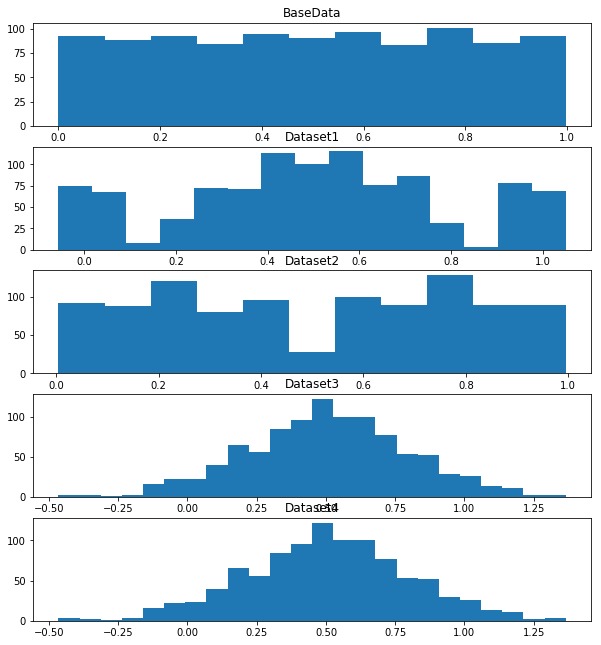

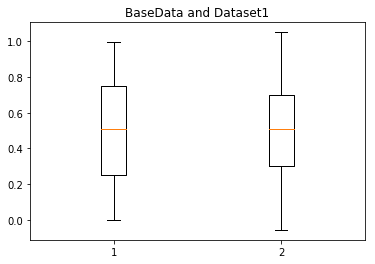

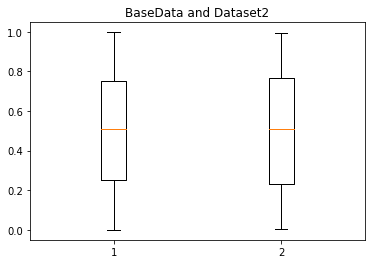

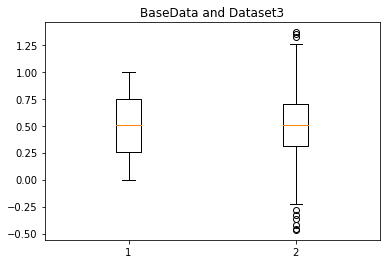

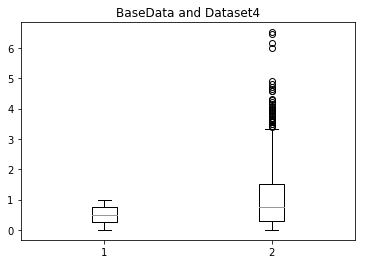

In [44]:
#Space for Task 9
import csv
import numpy as np
basedata = []
ds1 = []
ds2 = []
ds3 = []
ds4 = []

with open("dataset.csv") as csvDataFile:
        csvReader = csv.reader(csvDataFile)
        next(csvReader)
        for row in csvReader:
            basedata.append(float(row[0]))
            ds1.append(float(row[1]))
            ds2.append(float(row[2]))
            ds3.append(float(row[3]))
            ds4.append(float(row[4]))
        
#print(basedata)
def statsds(lst):
    """Will create a dictionary containing the summary statistics of the dataset
    Args:
        lst () - dataset list to be used in the function (basedata, ds1, ds2, ds3, ds4)
        ds {} - empty dictionary to store the summary statistics (mean, median, standard deviation, variance,
                minimum, 25th percentile, 75th percentile, and maximum) of the dataset
    Returns:
        ds {} - filled dictionary with the dataset's summary statistics."""
    ds = {}
    ds['Mean'] = np.mean(lst)
    ds['Median'] = np.median(lst)
    ds['Standard Deviation'] = np.std(lst)
    ds['Variance'] = np.var(lst)
    ds['Minimum'] = np.amin(lst)
    ds["25th percentile"]= np.percentile(lst, 25)
    ds["75th percentile"]= np.percentile(lst, 75)
    ds['Maximum'] = np.amax(lst)
    return(ds)

#Statistics
#print(basedata)
import matplotlib.pyplot as plt
basedata_stats = statsds(basedata)
print("BaseData Stats:")
print(basedata_stats)

ds1_stats = statsds(ds1)
print("Dataset1 Stats:")
print(ds1_stats)

#Plot of the 5 histograms
plt.figure(1, figsize= (10,11))
plt.subplot(5,1,1)
plt.hist(basedata, bins = "auto")
plt.title("BaseData")
plt.subplot(5,1,2)
plt.hist(ds1, bins = "auto")
plt.title('Dataset1')
plt.subplot(5,1,3)
plt.hist(ds2, bins = "auto")
plt.title("Dataset2")
plt.subplot(5,1,4)
plt.hist(ds3, bins = "auto")
plt.title('Dataset3')
plt.subplot(5,1,5)
plt.hist(ds3, bins = "auto")
plt.title('Dataset4')

#BaseData and Dataset1 Boxplot
plt.figure(2)
data1 = [basedata, ds1]
plt.boxplot(data1)
plt.title('BaseData and Dataset1')

ds2_stats = statsds(ds2)
print("Dataset2 Stats:")
print(ds2_stats)

#BaseData and Dataset2 Boxplot
plt.figure(3)
data2 = [basedata, ds2]
plt.boxplot(data2)
plt.title('BaseData and Dataset2')

ds3_stats = statsds(ds3)
print("Dataset3 Stats:")
print(ds3_stats)

#BaseData and Dataset3 Boxplot
plt.figure(4)
data3 = [basedata, ds3]
plt.boxplot(data3)
plt.title('BaseData and Dataset3')


ds4_stats = statsds(ds4)
print("Dataset4 Stats:")
print(ds4_stats)

#BaseData and Dataset4 Boxplot
plt.figure(5)
data4 = [basedata, ds4]
plt.boxplot(data4)
plt.title('BaseData and Dataset4')





In [ ]:
"""Originally, I would have liked to conduct a Student's T-test to determine if the 
difference of means between each dataset and the BaseData is significant, however Numpy does not provide a way to do that. 

Since I was unable to conduct a t-test, I cannot say for certain that any of the datasets could belong 
to the same population as the BaseData. So, I would like to analyze the data via their histograms and boxplots. 


In comparing the two datasets (BaseData and Dataset1) we see that the 
BaseData's mean (0.500604599455) is slightly greater than Dataset1's mean (0.500503019741) 
and the BaseData's standard deviation (0.2883563460468802) is less than Dataset1's
standard deviation (0.29335624973803676). Though, Dataset1's mean is close to the BaseData's,
its standard deviation shows that the data is more spread out. This can also be seen in the 
comparison of their boxplots. I believe Dataset1 does not belong to the same population as BaseData 
because their histograms show different distributions.

In comparing the two datasets (BaseData and Dataset2) we see that the 
BaseData's mean (0.500604599455) is slightly smaller than Dataset2's mean (0.500644100776) 
and the BaseData's standard deviation (0.2883563460468802) is less than Dataset2's
standard deviation (0.2933555903836922). Though, Dataset2's mean is close to the BaseData's,
its standard deviation shows that the data is more spread out. This can also be seen in the 
comparison of their boxplots. I believe Dataset2 does not belong to the same population as BaseData 
because their histograms show different distributions, even if Dataset2's boxplot is more similar to
BaseData's boxplot than Dataset1.

Comparing Dataset3 to BaseData, Dataset3's mean and standard deviation are both larger than 
BaseData's. Dataset3's boxplot shows a wider spread of data along with a few outliers. Dataset3's
histogram also show a normal distribution of data, which BaseData's does not. For these two reasons,
I do not believe that Dataset3 was pulled from the same distribution as BaseData.

Comparing Dataset4 to BaseData, Dataset4's mean and standard deviation are both extremely larger than 
BaseData's. Dataset4's boxplot shows a wider spread of data along with a even more outliers than Dataset3. 
Dataset4's histogram also shows a right skewed distribution of data, which BaseData's does not. 
For these two reasons, I do not believe that Dataset4 was pulled from the same distribution as BaseData.
"""




